In [1]:
%matplotlib inline

# Step 1: Load dataset, split into training and test sets, and scale features
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

# load boston housing price dataset
boston = load_boston()
x = boston.data
y = boston.target

# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

print("From", x_train.shape, "to", x_train_scaled.shape)
print("From", x_test.shape, "to", x_test_scaled.shape)

From (404, 13) to (404, 13)
From (102, 13) to (102, 13)


In [2]:
# Step 2: Add intercept terms and initialize parameters
# Note: If you run this step again, please run from step 1 because notebook keeps the value from the previous run

x_train_scaled = np.hstack((np.ones((x_train_scaled.shape[0], 1)), x_train_scaled))
x_test_scaled = np.hstack((np.ones((x_test_scaled.shape[0], 1)), x_test_scaled))

print(x_train_scaled.shape)
print(x_test_scaled.shape)

# init parameters using random values
theta = np.random.normal(loc = 0, scale = 0.5, size = (1,x_train_scaled.shape[1]))
theta = np.transpose(theta)
print(theta)

(404, 14)
(102, 14)
[[ 0.54846839]
 [ 0.04063778]
 [-0.332176  ]
 [-0.34496959]
 [ 0.29870632]
 [-0.62162113]
 [-0.31208781]
 [ 0.50957338]
 [-0.0074689 ]
 [-0.13085022]
 [-0.71256798]
 [ 0.08823888]
 [ 0.22428666]
 [ 0.12836756]]


In [3]:
# Step 3: Implement the gradient and the cost function
# In this step, you have to calculate the gradient. You can use the provided formula but the best way is to vectorize
# that formula for efficiency
def compute_gradient(x,y,theta):
    y = np.reshape(y, (x.shape[0],1))
    return 1/(x.shape[0]) * np.matmul( np.transpose(x), np.matmul(x,theta)-y )

def compute_cost(x,y,theta):
    y = np.reshape(y, (x.shape[0],1))
    return 1/(2*x.shape[0]) * np.matmul( np.transpose(np.matmul(x,theta) - y), np.matmul(x,theta) - y )

In [4]:
# Step 4: Verify the gradient value
# In this step, you need to verify that the computed gradient is correct. The difference betweet the gradient and the
# approximate gradient should be very small (~10^-18)


def approximate_gradient(x,y,theta,epsilon):
    n_features = x.shape[1]
    app_grad = np.zeros(n_features)
    epsilon_matrix = np.hstack(([epsilon], np.zeros(x.shape[1]-1)))
    epsilon_matrix = np.reshape(epsilon_matrix, (x_test_scaled.shape[1],1))
    for i in range(n_features):
        a = compute_cost(x, y, theta + epsilon_matrix)
        b = compute_cost(x, y, theta - epsilon_matrix)
        app_grad[i] = (compute_cost(x, y, theta + epsilon_matrix) - compute_cost(x, y, theta - epsilon_matrix))/(2*epsilon)
        epsilon_matrix = np.roll(epsilon_matrix, 1)
    return app_grad


#print(theta.shape)
grad = compute_gradient(x_train_scaled,y_train,theta)
epsilon = 1e-4
app_grad = approximate_gradient(x_train_scaled,y_train,theta,epsilon)
app_grad = np.reshape(app_grad, (x_test_scaled.shape[1],1))
print('Sum of gradient squared error: ',np.sum((grad - app_grad)**2))

print(grad.shape)
print(app_grad.shape)

Sum of gradient squared error:  8.12010607917e-19
(14, 1)
(14, 1)


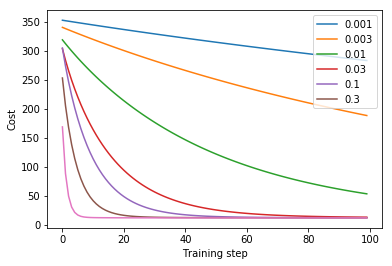

In [7]:
# Step 5: Try gradient descent algorithm with different learning rates
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rates = [0.001,0.003,0.01,0.03,0.1,0.3]

# this matrix keeps the learned parameters
theta_matrix = np.zeros((len(learning_rates),x_train_scaled.shape[1]))

# number of training iterations
N_iterations = 100

# prepare to plot
plt.subplot(111)

# calculate cost value and update theta
for indx,alpha in enumerate(learning_rates):
    # keep the cost value for each training step
    J = np.zeros(N_iterations)
    
    # initialize new parameters using random distribution
    theta = 0.5 * np.random.randn(x_train_scaled.shape[1],1)
    for step in range(N_iterations):
        # update theta
        theta = theta - alpha * compute_gradient(x_train_scaled, y_train, theta)
        
        # save the value of theta
        theta_matrix[indx,:] = np.reshape(theta, (x_train_scaled.shape[1]))
        
        # calculate the cost on traing set
        J[step] = compute_cost(x_train_scaled, y_train, theta)
    # plot cost function
    plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.legend(('0.001','0.003','0.01','0.03','0.1','0.3'), loc='upper right')
plt.show()

(1, 1)
test cost:  [[ 37.22219153]]


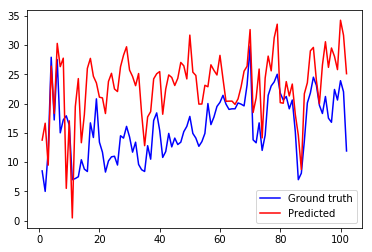

In [6]:
# Step 6: Predict the price of house
# You have to select the best theta you found
theta = theta_matrix[-3,:]
theta = np.reshape(theta, (x_test_scaled.shape[1],1))
predict_price = np.matmul(x_test_scaled,theta)

# calculate the cost for the test set
test_cost = compute_cost(x_test_scaled, y_test, theta)
print(test_cost.shape)
print('test cost: ',test_cost)

# plot the ground truth and the predicted
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()